# mount your google drive in colab

In [1]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive

Mounted at /gdrive
/gdrive/MyDrive


# Download [requirment files](https://drive.google.com/file/d/1KXhBxmKGjrZN_FJrX2YYXmT-ONPPlYC5/view) to your google driver

* open link and save compressed file to your google drive (click **add to drive** on right corner of the page)
* choose your data path
* default data path is /gdrive/MyDrive/mri

In [2]:
data_path = '/gdrive/MyDrive/'

!7z x 'Ex04_fMRI_requirement.7z' -o/gdrive/MyDrive/mri


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 507079453 bytes (484 MiB)

Extracting archive: Ex04_fMRI_requirement.7z
--
Path = Ex04_fMRI_requirement.7z
Type = 7z
Physical Size = 507079453
Headers Size = 558
Method = LZMA2:24
Solid = +
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     /gdrive/MyDrive/mri/ANTs-28-03-2019.7z
  Size:     315597527 bytes (301 MiB)
  Modified: 2022-05-30 15:38:21
with the file from archive:
  Path:     ANTs-28-03-2019.7z
  Size:     315597527 bytes (301 MiB)
  Modified: 2022-05-04 13:36:04
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? s

  0% . ANTs-28-03-2019.7z                          27% . ANTs-28-03-2019.7z

# Extract and add pre-build [ANTs](https://github.com/ANTsX/ANTs) (Advanced Normalization Tools) to enviroment

## Caution : **Don't change "ANTs_PATH"**


In [3]:
import os

%cd /gdrive/MyDrive/mri

ANTs_PATH = '/gdrive/MyDrive/ANTs'

!mkdir -p $ANTs_PATH


!7z x ANTs-28-03-2019.7z -o/gdrive/MyDrive/ANTs -y
os.environ['PATH'] += f":{ANTs_PATH}/bin"
!chmod +x $ANTs/bin*

/gdrive/MyDrive/mri

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 315597527 bytes (301 MiB)

Extracting archive: ANTs-28-03-2019.7z
--
Path = ANTs-28-03-2019.7z
Type = 7z
Physical Size = 315597527
Headers Size = 2380
Method = LZMA2:24 BCJ
Solid = +
Blocks = 1

  0%      0% 1 - bin/ANTS                   1% 1 - bin/ANTS                   1% 2 - bin/ANTSIntegrateVectorField                                       2% 2 - bin/ANTSIntegrateVectorField                                       2% 3 - bin/ANTSIntegrateVelocityField

### check ANTs works or not.
### if it works you sould see something like this line :
### *Usage: ResampleImage imageDimension inputImage outputImage MxNxO*


In [4]:
!ResampleImage 

Usage: ResampleImage imageDimension inputImage outputImage MxNxO [size=1,spacing=0] [interpolate type] [pixeltype]
  Interpolation type: 
    0. linear (default)
    1. nn 
    2. gaussian [sigma=imageSpacing] [alpha=1.0]
    3. windowedSinc [type = 'c'osine, 'w'elch, 'b'lackman, 'l'anczos, 'h'amming]
    4. B-Spline [order=3]
 pixeltype  :  TYPE 
  0  :  char   
  1  :  unsigned char   
  2  :  short   
  3  :  unsigned short   
  4  :  int   
  5  :  unsigned int   
  6  :  float (default)  
  7  :  double  


### Plot function

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import color

def plot_mp_mri(mri,mask=None, slice_num = [40,40,50],bold = False,time = None):
  

  plt.style.context('dark_background')
  rot = lambda img : ndimage.rotate(img,90)
  if mask is None :
    f = plt.figure(figsize = (16,8))
    f.patch.set_facecolor('black')
    ax = plt.subplot(131)
    ax.imshow(ndimage.rotate(mri[slice_num[0],:,:],90),cmap = 'gray')
    ax.axis("off")
    ax.set_title(f'X={slice_num[0]}',color= 'white',loc = 'left')

    ax1 = plt.subplot(132)
    ax1.imshow(rot(mri[:,slice_num[1],:]),cmap = 'gray')
    ax1.axis("off")
    ax1.set_title(f'Y={slice_num[1]}',color= 'white',loc = 'left')
    
    ax2 = plt.subplot(133)
    ax2.imshow(rot(mri[:,:,slice_num[2]]),cmap = 'gray')
    ax2.axis("off")
    ax2.set_title(f'Z={slice_num[2]}',color= 'white',loc = 'left')

    plt.show()
 
  else:
    if bold:
      f = plt.figure(figsize = (16,8))
      f.patch.set_facecolor('black')
      ct = mask[:,:,:,time]

      ax = plt.subplot(131)
      ax.imshow(rot(mri[slice_num[0],:,:]),cmap = 'gray')
      ax.imshow(rot(ct[slice_num[0],:,:]),alpha = .3,cmap = 'hot')
      ax.axis("off")
      ax.set_title(f'X={slice_num[0]}',color= 'white',loc = 'left')    

      ax1 = plt.subplot(132)
      ax1.imshow(rot(mri[:,slice_num[1],:]),cmap = 'gray')
      ax1.imshow(rot(ct[:,slice_num[1],:]),alpha = .3,cmap = 'hot')
      ax1.axis("off")
      ax1.set_title(f'Y={slice_num[1]}',color= 'white',loc = 'left')

      ax2 = plt.subplot(133)
      ax2.imshow(rot(mri[:,:,slice_num[2]]),cmap = 'gray')
      ax2.imshow(rot(ct[:,:,slice_num[2]]),alpha = .3,cmap = 'hot')
      ax2.axis("off")
      ax2.set_title(f'Z={slice_num[2]}',color= 'white',loc = 'left')

      plt.show()
    else:
      f = plt.figure(figsize = (16,8))
      f.patch.set_facecolor('black')
      ct = color.label2rgb(mask, bg_label=0)

      ax = plt.subplot(131)
      ax.imshow(rot(mri[slice_num[0],:,:]),cmap = 'gray')
      ax.imshow(rot(ct[slice_num[0],:,:,:]),alpha = .3)
      ax.axis("off")
      ax.set_title(f'X={slice_num[0]}',color= 'white',loc = 'left')    

      ax1 = plt.subplot(132)
      ax1.imshow(rot(mri[:,slice_num[1],:]),cmap = 'gray')
      ax1.imshow(rot(ct[:,slice_num[1],:,:]),alpha = .3)
      ax1.axis("off")
      ax1.set_title(f'Y={slice_num[1]}',color= 'white',loc = 'left')

      ax2 = plt.subplot(133)
      ax2.imshow(rot(mri[:,:,slice_num[2]]),cmap = 'gray')
      ax2.imshow(rot(ct[:,:,slice_num[2],:]),alpha = .3)
      ax2.axis("off")
      ax2.set_title(f'Z={slice_num[2]}',color= 'white',loc = 'left')

      plt.show()

#plot T1 image and MNI152 images

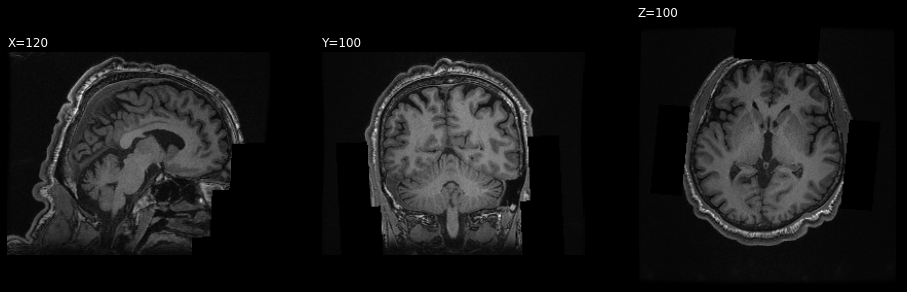

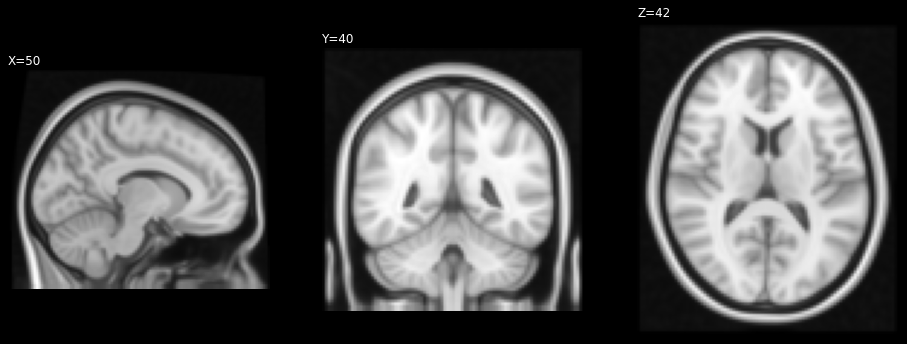

In [3]:
data_path = '/gdrive/MyDrive/mri'

template = nib.load(data_path + '/MNI152_T1_2mm.nii.gz')
T1 = nib.load(data_path +  '/T1w.nii.gz')
temp_mask = nib.load( data_path + '/MNI152_T1_2mm_brain_mask.nii.gz')

plot_mp_mri(T1.get_fdata(),slice_num=[120,100,100])
plot_mp_mri(template.get_fdata(),slice_num=[50,40,42])

## Know we plot MNI152 template image with brain mask file then we do this with T1w image and template mask.
### as you can see T1w and Template brain mask are not aligned together so, we will register T1w image to tmplate image in next level.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


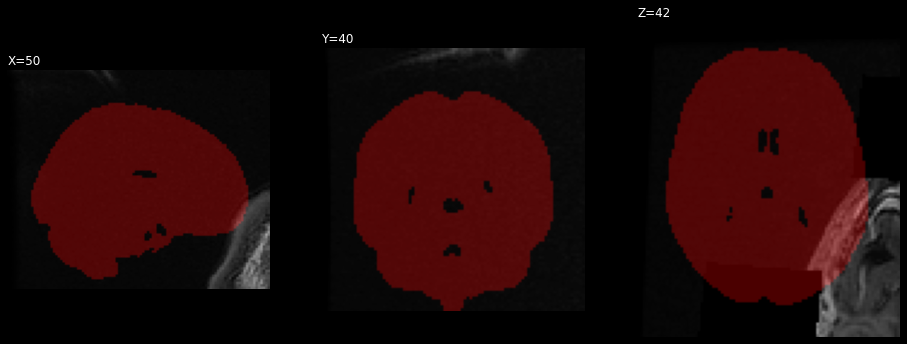

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


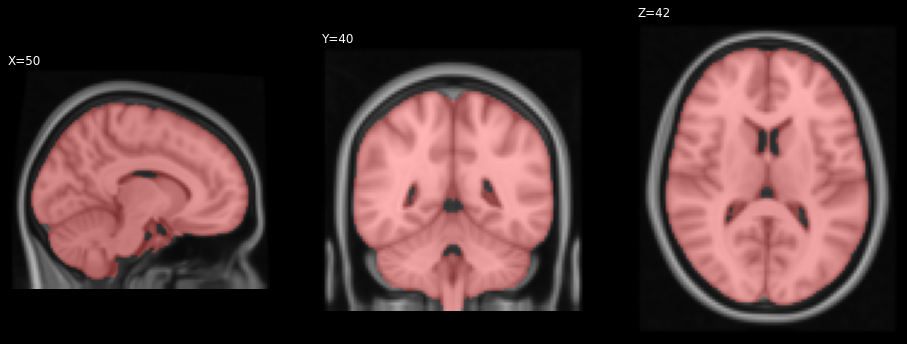

In [7]:
plot_mp_mri(T1.get_fdata(),temp_mask.get_fdata(),slice_num=[50,40,42])
plot_mp_mri(template.get_fdata(),temp_mask.get_fdata(),slice_num=[50,40,42])

### Register T1w image to MNI152 Template
 

In [8]:
!bash antsRegistrationSyNQuick.sh -d 3 -f MNI152_T1_2mm.nii.gz -m T1w.nii.gz -o T12std_ -n 10


--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /gdrive/MyDrive/ANTs/bin

 Dimensionality:           3
 Output name prefix:       T12std_
 Fixed images:             MNI152_T1_2mm.nii.gz
 Moving images:            T1w.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        10
 Spline distance:          26
 Transform type:           s
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/gdrive/MyDrive/ANTs/bin/antsRegistration --verbose 1 --dimensionality 3 --float 0 --collapse-output-transforms 1 --output [ T12std_,T12std_Warped.nii.gz,T12std_InverseWarped.nii.gz ] --interpolation Linear --use-histogram-matching 0 --winsorize-image-intensities [ 0.005,

## Plot registerd T1w image together with our template brain mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


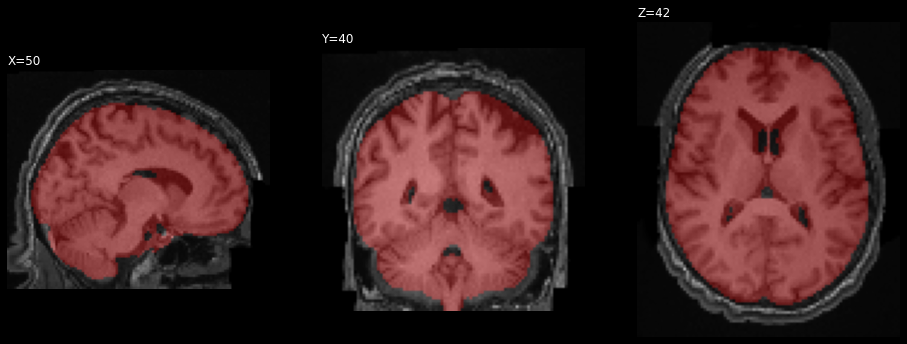

In [9]:
T1_registerd = nib.load(f'{data_path}/T12std_Warped.nii.gz')
plot_mp_mri(T1_registerd.get_fdata(),temp_mask.get_fdata(),slice_num=[50,40,42])

## Dummy skull-stripng !!!

(91, 109, 91)
(91, 109, 91)


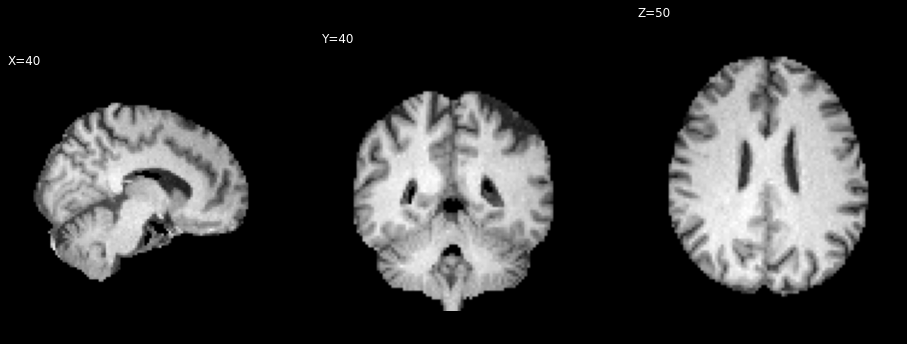

In [10]:
ss_t1 = temp_mask.get_fdata() * T1_registerd.get_fdata()
print(temp_mask.get_fdata().shape)
print(T1_registerd.get_fdata().shape)
plot_mp_mri(ss_t1)

# Brain Extraction (Skull Striping) by ANTs function
* it takes ~ 1 hr to complete !!!
* right way for skull stripng :)

In [ ]:
!bash antsBrainExtraction.sh -d 3 -a T12std_Warped.nii.gz -e T_template0.nii.gz -m T_template0_BrainCerebellumProbabilityMask.nii.gz -o T1_

 
Will run Atropos segmentation with K=3. Classes labeled in order of mean intensity. Assuming CSF=1, GM=2, WM=3

The output directory "T1_" does not exist. Making it.

    Using antsBrainExtraction with the following arguments:
      image dimension         = 3
      anatomical image        = T12std_Warped.nii.gz
      extraction template     = T_template0.nii.gz
      extraction reg. mask    = 
      extraction prior        = T_template0_BrainCerebellumProbabilityMask.nii.gz
      output prefix           = T1_
      output image suffix     = nii.gz

    N4 parameters (pre brain extraction):
      convergence             = [ 50x50x50x50,0.0000001 ]
      shrink factor           = 4
      B-spline parameters     = [ 200 ]

    Atropos parameters (extraction):
       convergence            = [ 3,0.0 ]
       likelihood             = Gaussian
       initialization         = kmeans[ 3 ]
       mrf                    = [ 0.1,1x1x1 ]
       use clock random seed  = 1

--------------------- 

# T1w extracted brain 

<Figure size 720x360 with 0 Axes>

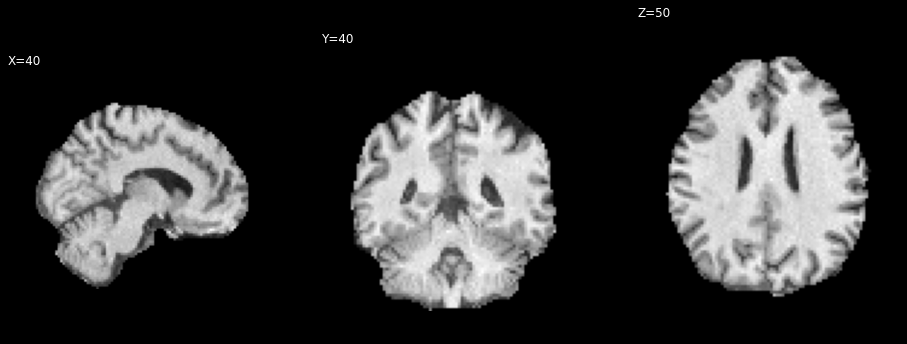

In [11]:
plt.figure(figsize = (10,5))
ss_brain = nib.load('/gdrive/MyDrive/mri/T1_BrainExtractionBrain.nii.gz')
plot_mp_mri(ss_brain.get_fdata())

## As you can see below we plot dummy brain extrcted image together with template mask, you can change the slice numbers and see how these two imges are aligned.

#First question

* we skiped one step from normalzation of T1w image to template image intentionally, based of above information,what do you think about droped step?, what that step is?
* Please write your answer in a new text section below this one.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


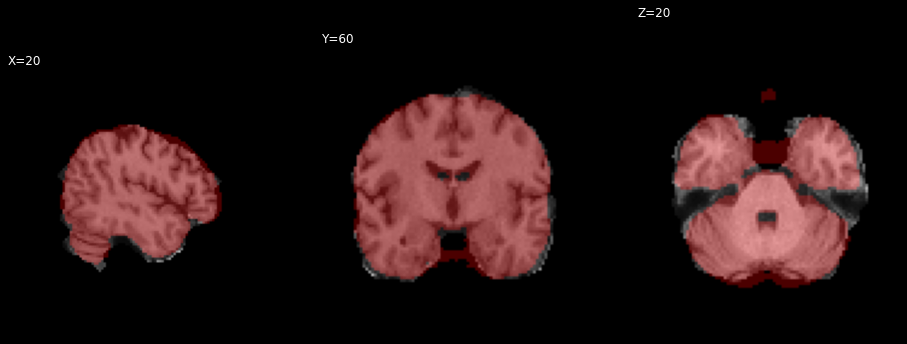

In [12]:
plot_mp_mri(ss_brain.get_fdata(),temp_mask.get_fdata(),[20,60,20])

# T1 image segmentation with [FastSurfer](https://github.com/Deep-MI/FastSurfer)

> Indented block



In [13]:
import os
import sys
from os.path import exists, join, basename, splitext

%cd /content
git_repo_url = 'https://github.com/deep-mi/fastsurfer.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  sys.path.append(project_name)

# Go to the FastSurfer directory
%cd /content/fastsurfer/
!cp $data_path/T12std_Warped.nii.gz /content
img = '/content/T12std_Warped.nii.gz'

# Run the program
! ./run_fastsurfer.sh --t1 $img \
                      --sd /content/fastsurfer_seg \
                      --sid my_sub \
                      --seg_only --py python3

/content
/content/fastsurfer
Setting ENV variable FASTSURFER_HOME to current working directory /content/fastsurfer. 
Change via enviroment to location of your choice if this is undesired (export FASTSURFER_HOME=/dir/to/FastSurfer)
Fri Jun  3 07:09:03 UTC 2022

/content/fastsurfer/FastSurferCNN /content/fastsurfer
python3 eval.py --in_name /content/T12std_Warped.nii.gz --out_name /content/fastsurfer_seg/my_sub/mri/aparc.DKTatlas+aseg.deep.mgz --conformed_name /content/fastsurfer_seg/my_sub/mri/orig.mgz --order 1 --network_sagittal_path /content/fastsurfer/checkpoints/Sagittal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --network_axial_path /content/fastsurfer/checkpoints/Axial_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --network_coronal_path /content/fastsurfer/checkpoints/Coronal_Weights_FastSurferCNN/ckpts/Epoch_30_training_state.pkl --batch_size 8 --simple_run --run_viewagg_on check
Reading volume /content/T12std_Warped.nii.gz
The input image is not conformed

### Convert outputs of FastSurfer from (freesurfer formate) .mgz to .nii.gz 

In [14]:
data = nib.load('/content/fastsurfer_seg/my_sub/mri/aparc.DKTatlas+aseg.deep.mgz')
img_nifti = nib.Nifti1Image(data.get_fdata(), data.affine, header=nib.Nifti1Header())
nib.nifti1.save(img_nifti, f'{data_path}/aparc.DKTatlas+aseg.deep.nii.gz')

data = nib.load('/content/fastsurfer_seg/my_sub/mri/orig.mgz')
img_nifti = nib.Nifti1Image(data.get_fdata(), data.affine, header=nib.Nifti1Header())
nib.nifti1.save(img_nifti, f'{data_path}/orig.nii.gz')

## register segmented image to MNI152 Template



In [15]:
%cd $data_path
!bash antsRegistrationSyNQuick.sh -d 3 -f MNI152_T1_2mm.nii.gz -m orig.nii.gz -o seg2std_ -n 10

/gdrive/MyDrive/mri

--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /gdrive/MyDrive/ANTs/bin

 Dimensionality:           3
 Output name prefix:       seg2std_
 Fixed images:             MNI152_T1_2mm.nii.gz
 Moving images:            orig.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        10
 Spline distance:          26
 Transform type:           s
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/gdrive/MyDrive/ANTs/bin/antsRegistration --verbose 1 --dimensionality 3 --float 0 --collapse-output-transforms 1 --output [ seg2std_,seg2std_Warped.nii.gz,seg2std_InverseWarped.nii.gz ] --interpolation Linear --use-histogram-matching 0 --winsorize-i

## Apply Tansfrom to label image 

In [16]:
!antsApplyTransforms -d 3 -i aparc.DKTatlas+aseg.deep.nii.gz -r MNI152_T1_2mm.nii.gz -n MultiLabel -t [seg2std_0GenericAffine.mat,0] -t seg2std_1Warp.nii.gz -o T1_segmented.nii.gz 

## plot segmentation result

In [ ]:
seg = nib.load(data_path + '/T1_segmented.nii.gz')
plot_mp_mri(mri = T1_registerd.get_fdata(), mask = seg.get_fdata(),slice_num=[30,60,30])

# Plot rest fMRI image

In [49]:
maskmask = temp_mask.get_fdata()
maskmask = maskmask[:, :, :, np.newaxis]
print(maskmask.shape)


(91, 109, 91, 1)


/gdrive/MyDrive/mri
(91, 109, 91, 120)


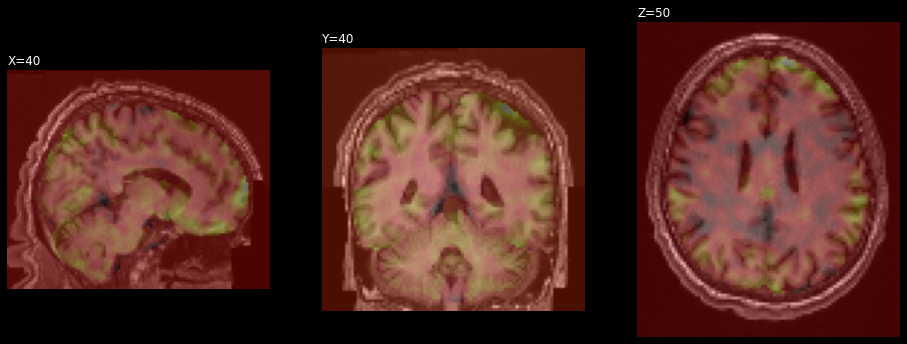

In [50]:
%cd $data_path
rest = nib.load('rest.nii.gz')
rest2 = rest.get_fdata() * maskmask
print(rest.shape)
plot_mp_mri(T1_registerd.get_fdata(),rest2, bold = True,time = 50,slice_num = [40,40,50])

## plot some voxles from left hippocampus.
##### to find left hippocampus label use *aparc+seg.txt* in requirement files

<function matplotlib.pyplot.show>

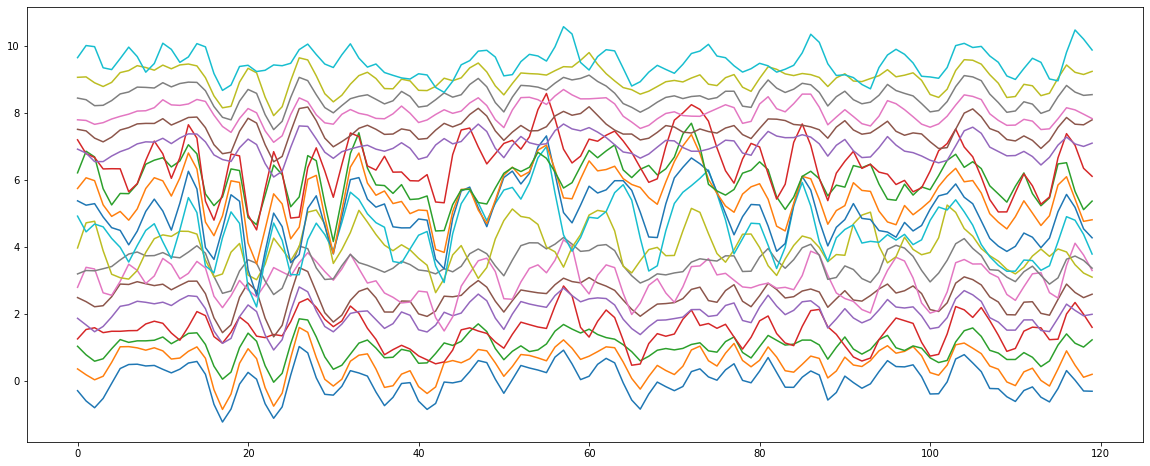

In [148]:
plt.figure(figsize = (20,8))
L_Hippocampus = 17

for voxel in range(20):
  plt.plot(range(120),rest.get_fdata()[seg.get_fdata() == 17][voxel]+ (.5 * voxel))

plt.show


# Seed-base correlation Analysis :

#### Seed-based Correlation Analysis (SCA) is one of the most common ways to explore functional connectivity within the brain. Based on the time series of a seed voxel (or ROI), connectivity is calculated as the correlation of time series for all other voxels in the brain. The result of SCA is a connectivity map showing Z-scores for each voxel indicating how well its time series correlates with the time series of the seed. Below is an example connectivity map showing correlated voxels based on a seed in the precuneus.






$$ r(x) = {\int{ S(x,t) R(t) dt } \over { \left( \int{ R^2(t) dt }\int{ S^2(x,t) dt }  \right)^{1/2} }} $$

\\
$$Z(x) = arctanh^{-1} ( r(x) ) $$

\\


* $S$ ➡ the BOLD timeseries at each voxel (for simplicity all timeseries are considered centered to zero mean).

* $R$ ➡ the average BOLD timeseries within an ROI

* $r$ ➡ the spatial map of Pearson correlation coefficients

* $x$ ➡ spatial location (voxels)

## File rest.nii.gz is mean resting state functional image for 1000 subjects.
## use this file and seed mask files to ask below questions.

* for each seed mask file, find the volume of seed region.
* for each seed mask file, find percentage of overlap between segmented labels(*aparc+seg.txt*) and seed region.
* Calculate SCA for each seed mask, transform raw r-values to Z-fisher and then find volexs with z-value more than 0.999 and less than 0.001 percentile values (significant voxels).
* for each seed mask, find percentage of SCA significant voxels of each region in segmented file.
* plot inter-section between all 5 seed region SC network in a $5 \times 5$ matrix based on number of overlaped voxels



* Don't forget "**Do the all calculations just inside Brain mask**"

### Importing seeds with nib.load

In [57]:
seed1_mask = nib.load(data_path + '/seed1.nii')
seed2_mask = nib.load(data_path + '/seed2.nii')
seed3_mask = nib.load(data_path + '/seed3.nii')
seed4_mask = nib.load(data_path + '/seed4.nii')
seed5_mask = nib.load(data_path + '/seed5.nii')
masks = [seed1_mask.get_fdata(), seed2_mask.get_fdata(), seed3_mask.get_fdata(), seed4_mask.get_fdata(), seed5_mask.get_fdata()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


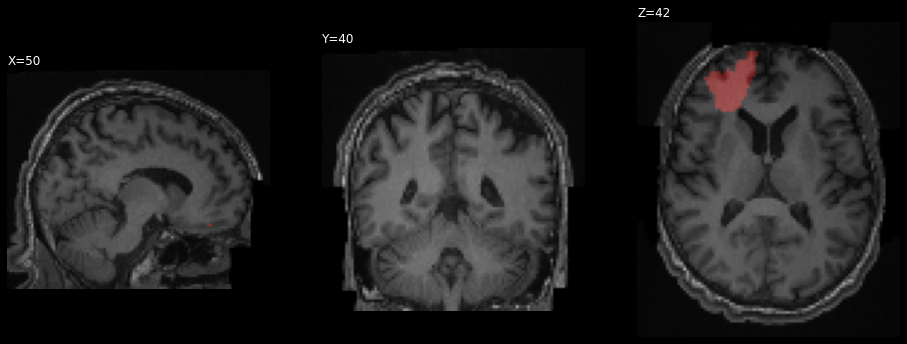

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


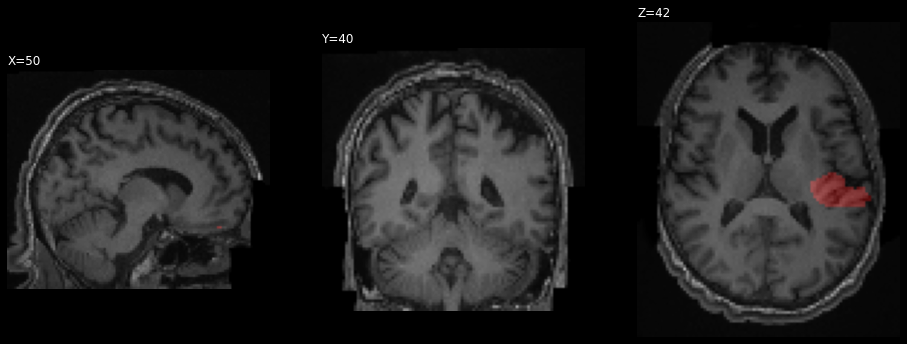

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


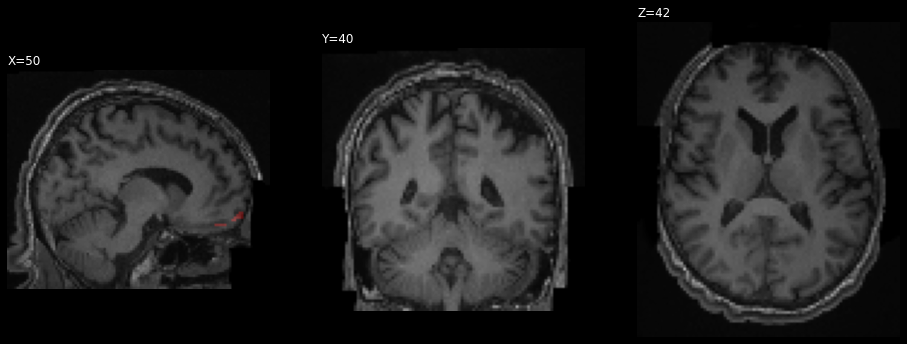

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


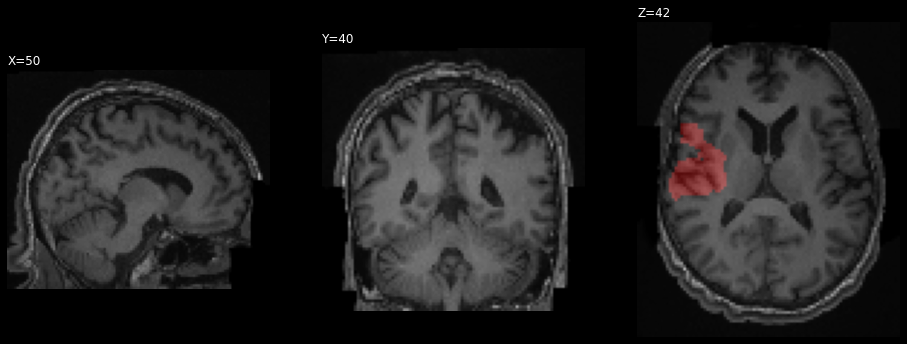

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


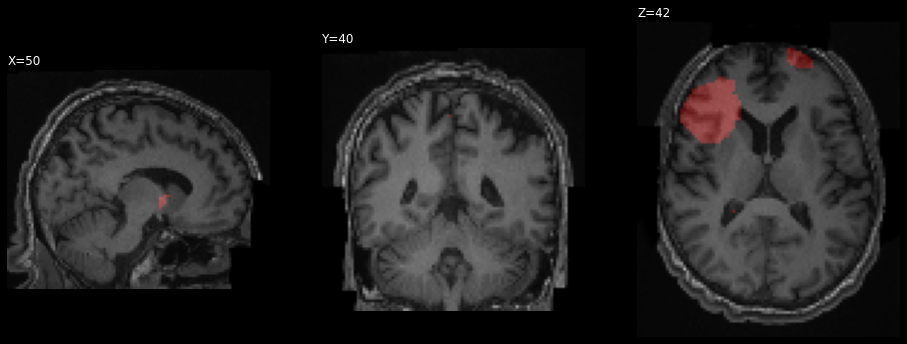

In [10]:
plot_mp_mri(T1_registerd.get_fdata(),seed1_mask.get_fdata(),slice_num=[50,40,42])
plot_mp_mri(T1_registerd.get_fdata(),seed2_mask.get_fdata(),slice_num=[50,40,42])
plot_mp_mri(T1_registerd.get_fdata(),seed3_mask.get_fdata(),slice_num=[50,40,42])
plot_mp_mri(T1_registerd.get_fdata(),seed4_mask.get_fdata(),slice_num=[50,40,42])
plot_mp_mri(T1_registerd.get_fdata(),seed5_mask.get_fdata(),slice_num=[50,40,42])

### 1. Calculation volume of each seed

In [11]:
voxelSizeX = 1.02
voxelSizeY = 1.02
voxelSizeZ = 1
def calculate_volume(input_mask):
  elements = np.nonzero(input_mask.get_fdata())
  nMasks   = len(elements[0])
  volume   = nMasks * voxelSizeX * voxelSizeY * voxelSizeZ
  return volume

volume = np.zeros(5)
for i in range(5):
  volume[i] = "{:.4f}".format(calculate_volume(masks[i]))
  print("Volume of seed " + str(i + 1) + " is: " + str(volume[i]) + " mm^3")

Volume of seed 1 is: 10177.1928 mm^3
Volume of seed 2 is: 2301.3648 mm^3
Volume of seed 3 is: 177.9084 mm^3
Volume of seed 4 is: 4891.9608 mm^3
Volume of seed 5 is: 8714.3904 mm^3


### 2. Percentage of overlap between segmented labels and seed region.

In [12]:
with open(data_path + '/aparc+seg.txt') as f:
    lines = f.readlines()

for i in range(1, len(lines), 2):
    lines[i] = int(lines[i].strip(' \n'))

regionIdx = lines[1::2]

In [66]:
def overlap_seg(input_mask, idx, seednum):
  elements = np.nonzero(input_mask)
  nMasks   = len(elements[0])
  overlap  = []
  outstr   = ""
  print("Overlap for seed " + str(seednum) + " is: " + '\n')
  for i in range(len(idx)):
    overlap.append((sum(input_mask[seg.get_fdata() == idx[i]]) / nMasks))
    outstr = outstr + str(idx[i]) + ": " + str(overlap[i]) + ", "
  print(outstr)

In [61]:
overlap_seg(masks[0], regionIdx, 1)
overlap_seg(masks[1], regionIdx, 2)
overlap_seg(masks[2], regionIdx, 3)
overlap_seg(masks[3], regionIdx, 4)
overlap_seg(masks[4], regionIdx, 5)

Overlap for seed 1 is: 

0: 0.0827, 2: 0.0030, 4: 0.0000, 5: 0.0000, 7: 0.0000, 8: 0.0000, 10: 0.0000, 11: 0.0000, 12: 0.0000, 13: 0.0000, 14: 0.0000, 15: 0.0000, 16: 0.0000, 17: 0.0000, 18: 0.0000, 24: 0.0000, 26: 0.0000, 28: 0.0000, 30: 0.0000, 31: 0.0000, 41: 0.6159, 43: 0.0046, 44: 0.0000, 46: 0.0000, 47: 0.0000, 49: 0.0000, 50: 0.0074, 51: 0.0028, 52: 0.0000, 53: 0.0000, 54: 0.0000, 58: 0.0021, 60: 0.0000, 62: 0.0000, 63: 0.0000, 72: 0.0000, 77: 0.0004, 80: 0.0000, 85: 0.0000, 251: 0.0000, 252: 0.0000, 253: 0.0000, 254: 0.0000, 255: 0.0000, 1000: 0.0000, 1001: 0.0000, 1002: 0.0000, 1003: 0.0000, 1005: 0.0000, 1006: 0.0000, 1007: 0.0000, 1008: 0.0000, 1009: 0.0000, 1010: 0.0000, 1011: 0.0000, 1012: 0.0000, 1013: 0.0000, 1014: 0.0081, 1015: 0.0000, 1016: 0.0000, 1017: 0.0000, 1018: 0.0000, 1019: 0.0000, 1020: 0.0000, 1021: 0.0000, 1022: 0.0000, 1023: 0.0000, 1024: 0.0000, 1025: 0.0000, 1026: 0.0017, 1027: 0.0000, 1028: 0.0000, 1029: 0.0000, 1030: 0.0000, 1031: 0.0000, 1032: 0.0000, 

### 3. Calculate SCA for each seed 

In [15]:
seed1_mask = seed1_mask.get_fdata()[:, :, :, np.newaxis]
seed2_mask = seed2_mask.get_fdata()[:, :, :, np.newaxis]
seed3_mask = seed3_mask.get_fdata()[:, :, :, np.newaxis]
seed4_mask = seed4_mask.get_fdata()[:, :, :, np.newaxis]
seed5_mask = seed5_mask.get_fdata()[:, :, :, np.newaxis]


In [17]:
rest = nib.load(data_path + '/rest.nii.gz')
rest1 = rest.get_fdata() * seed1_mask
rest2 = rest.get_fdata() * seed2_mask
rest3 = rest.get_fdata() * seed3_mask
rest4 = rest.get_fdata() * seed4_mask
rest5 = rest.get_fdata() * seed5_mask

In [21]:
mean_rest1 = np.mean(rest1, axis = (0, 1, 2))
mean_rest2 = np.mean(rest2, axis = (0, 1, 2))
mean_rest3 = np.mean(rest3, axis = (0, 1, 2))
mean_rest4 = np.mean(rest4, axis = (0, 1, 2))
mean_rest5 = np.mean(rest5, axis = (0, 1, 2))

In [27]:
corr_rest1 = np.empty_like(seed1_mask)
corr_rest2 = np.empty_like(seed2_mask)
corr_rest3 = np.empty_like(seed3_mask)
corr_rest4 = np.empty_like(seed4_mask)
corr_rest5 = np.empty_like(seed5_mask)

In [ ]:
for i in range(corr_rest1.shape[0]):
  for j in range(corr_rest1.shape[1]):
    for k in range(corr_rest1.shape[2]):
      corr_rest1[i][j][k][:] = np.corrcoef(rest1[i][j][k][:], mean_rest1)[1][0]
      corr_rest2[i][j][k][:] = np.corrcoef(rest2[i][j][k][:], mean_rest2)[1][0]
      corr_rest3[i][j][k][:] = np.corrcoef(rest3[i][j][k][:], mean_rest3)[1][0]
      corr_rest4[i][j][k][:] = np.corrcoef(rest4[i][j][k][:], mean_rest4)[1][0]
      corr_rest5[i][j][k][:] = np.corrcoef(rest5[i][j][k][:], mean_rest5)[1][0]

In [44]:
corr_rest1_z = np.arctanh(corr_rest1)
corr_rest2_z = np.arctanh(corr_rest2)
corr_rest3_z = np.arctanh(corr_rest3)
corr_rest4_z = np.arctanh(corr_rest4)
corr_rest5_z = np.arctanh(corr_rest5)

In [48]:
rest1_significant = corr_rest1_z[(corr_rest1_z > 0.999) | (corr_rest1_z < 0.999)]
rest2_significant = corr_rest2_z[(corr_rest2_z > 0.999) | (corr_rest2_z < 0.999)]
rest3_significant = corr_rest3_z[(corr_rest3_z > 0.999) | (corr_rest3_z < 0.999)]
rest4_significant = corr_rest4_z[(corr_rest4_z > 0.999) | (corr_rest4_z < 0.999)]
rest5_significant = corr_rest5_z[(corr_rest5_z > 0.999) | (corr_rest5_z < 0.999)]

In [47]:
rest1_significant.shape

(9725,)

### 4. Percentage of SCA significant voxels of each region

In [52]:
temp1 = ((corr_rest1_z > 0.999) | (corr_rest1_z < 0.999)) & ~np.isnan(corr_rest1_z)
temp2 = ((corr_rest2_z > 0.999) | (corr_rest2_z < 0.999)) & ~np.isnan(corr_rest2_z)
temp3 = ((corr_rest3_z > 0.999) | (corr_rest3_z < 0.999)) & ~np.isnan(corr_rest3_z)
temp4 = ((corr_rest4_z > 0.999) | (corr_rest4_z < 0.999)) & ~np.isnan(corr_rest4_z)
temp5 = ((corr_rest5_z > 0.999) | (corr_rest5_z < 0.999)) & ~np.isnan(corr_rest5_z)

In [54]:
significant_seed1 = temp1.astype(int)
significant_seed2 = temp2.astype(int)
significant_seed3 = temp3.astype(int)
significant_seed4 = temp4.astype(int)
significant_seed5 = temp5.astype(int)

In [68]:
overlap_seg(significant_seed1, regionIdx, 1)
overlap_seg(significant_seed2, regionIdx, 2)
overlap_seg(significant_seed3, regionIdx, 3)
overlap_seg(significant_seed4, regionIdx, 4)
overlap_seg(significant_seed5, regionIdx, 5)

Overlap for seed 1 is: 

0: [0.07732648], 2: [0.00298201], 4: [0.], 5: [0.], 7: [0.], 8: [0.], 10: [0.], 11: [0.], 12: [0.], 13: [0.], 14: [0.], 15: [0.], 16: [0.], 17: [0.], 18: [0.], 24: [0.], 26: [0.], 28: [0.], 30: 0.0, 31: [0.], 41: [0.61953728], 43: [0.00462725], 44: [0.], 46: [0.], 47: [0.], 49: [0.], 50: [0.0074036], 51: [0.00277635], 52: [0.], 53: [0.], 54: [0.], 58: [0.00215938], 60: [0.], 62: 0.0, 63: [0.], 72: 0.0, 77: [0.00041131], 80: 0.0, 85: 0.0, 251: 0.0, 252: 0.0, 253: 0.0, 254: 0.0, 255: 0.0, 1000: 0.0, 1001: 0.0, 1002: [0.], 1003: [0.], 1005: [0.], 1006: [0.], 1007: [0.], 1008: [0.], 1009: [0.], 1010: [0.], 1011: [0.], 1012: [0.], 1013: [0.], 1014: [0.00812339], 1015: [0.], 1016: [0.], 1017: [0.], 1018: [0.], 1019: [0.], 1020: [0.], 1021: [0.], 1022: [0.], 1023: [0.], 1024: [0.], 1025: [0.], 1026: [0.00174807], 1027: [0.], 1028: [0.], 1029: [0.], 1030: [0.], 1031: [0.], 1032: 0.0, 1033: 0.0, 1034: [0.], 1035: [0.], 2000: 0.0, 2001: 0.0, 2002: [0.], 2003: [0.], 2005: